<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/LogoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [1]:
%matplotlib inline
import networkx as nx
from util import get_metro_graph, draw_metro_graph, get_path_subgraph
from test import test

/home/ralleg/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Barcelona. En este grafo los nodos representan las estaciones y los ejes las vías que van de una estación a otra. Todos los ejes tienen tres atributos:

* Linea
* Color
* Distancia


In [2]:
G = get_metro_graph('csv/lineasmetro.csv')
print G.get_edge_data(*G.edges()[0])

{'color': 'darkblue', 'distance': '855270', 'line': 'L5'}


Por otro lado los nodos en su lugar únicamente almacenan (y se indexan) por el nombre de la estación.

In [3]:
print G.nodes()[0]

Camp de l'Arpa


In [4]:
print G["Vilapicina"]

{'Virrei Amat': {'color': 'darkblue', 'distance': '634010', 'line': 'L5'}, 'Horta': {'color': 'darkblue', 'distance': '688150', 'line': 'L5'}}


# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
G = get_metro_graph(location)
# Retorna un objeto nx.Graph que corresponde al grafo de la red de metro
# - location: ruta donde esta almacenado el archivo .csv

P = get_path_subgraph(P, path)
# Retorna un objeto tipo nx.Graph que almacena los nodos y los ejes correspondientes al
# camino que le pasamos por parametro
# - P: Grafo original
# - path: Lista de nodos sobre los que queremos crear el subgrafo

draw_metro_graph(G, figsize=(10,10))
# Dibuja el grafo que le pasemos por parametro.
# - G: Grafo de la red de metro
# - figsize: parametro opcional que nos permite definir el tamaño de la figura
```

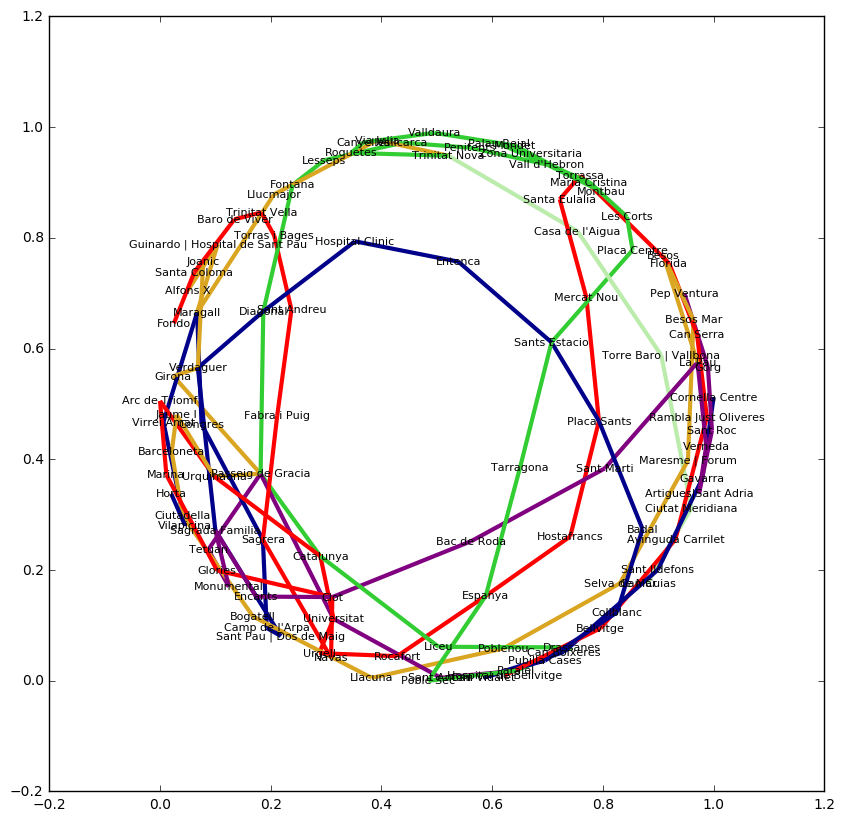

In [5]:
draw_metro_graph(G, figsize=(10,10))

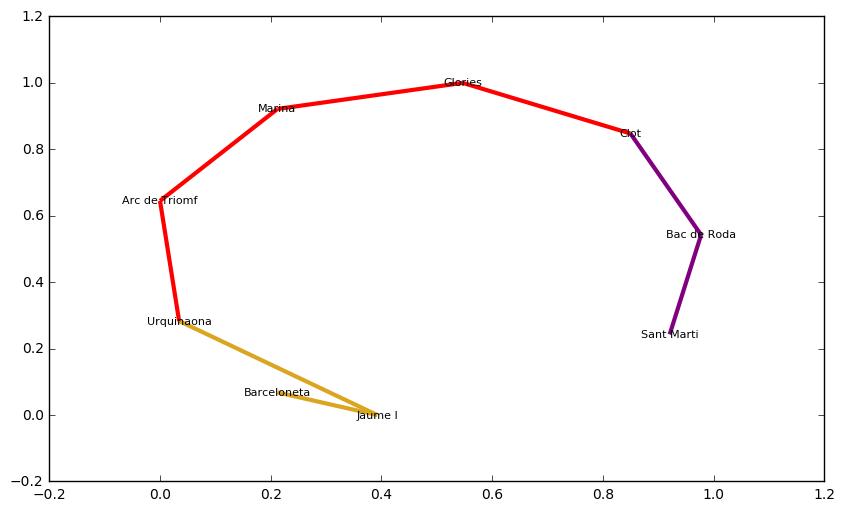

In [6]:
P = get_path_subgraph(G, [
        'Barceloneta',
        'Jaume I', 
        'Urquinaona', 
        'Arc de Triomf', 
        'Marina',
        'Glories',
        'Clot',
        'Bac de Roda',
        'Sant Marti'
    ])

draw_metro_graph(P)

# test.pyc

Este archivo contiene la función __test__ que servirá, a lo largo de la práctica para ir comprobando si los algoritmos implementados funcionan correctamente.

```python
    test(f_name, function)
    # Esta función hace un test de funcional y de forma de los algoritmos implementados.
    # - f_name: nombre de la funcion que queremos probar, a escoger: ['bfs', 'dijkstra', 'dijkstra2']
```

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo _Breadth First Search_. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una queue realizemos una exploración expansiva. Hay que tener en cuenta que la red de metro se construye como un grafo no dirigido, así que es importante controlar el hecho de que se visiten los nodos una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [7]:
def bfs(G, origen, destino):
    temp=[]
    temp.append((origen,[origen]))
    expanded=[]
    while not len(temp)==0:
        curPos,path=temp.pop(0)
        if curPos==destino:
            return {'path' : path,'expanded' : len(expanded)}
        if not curPos in expanded:
            expanded.append(curPos)
            for n in G.neighbors(curPos):
                temp.append((n,path+[n]))
    
print bfs(G, "Horta", "Mundet")

{'path': ['Horta', 'Vilapicina', 'Virrei Amat', 'Maragall', 'Llucmajor', 'Via Julia', 'Trinitat Nova', 'Roquetes', 'Canyelles', 'Valldaura', 'Mundet'], 'expanded': 44}


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [8]:
test('bfs', bfs)

== Test v0.2 ==
#1. Test de forma [OK]
#2. Test funcional
* Expanded [OK]
* Path [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Dijkstra</p></h2>
  
  <p>
 En esta segunda parte de la práctica se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de línea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parámetro opcional en el que definimos que número nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de línea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [53]:
def dijkstra(G, origen, destino, infinity=99999999999):
    temp=[]
    sol=[]
    expanded=[]
    nx.set_node_attributes(G,'cost',infinity)
    nx.set_node_attributes(G,'antecesor',"")
    G.node[origen]['cost'] = 0
    temp=[(origen,G.node[origen]['cost'])]
    while not len(temp)==0:
        curPos,c=temp.pop(0)
        expanded.append(curPos)
        if curPos==destino:
            for pos,cost in temp:
                if c>cost:
                    ant=G.node[curPos]['antecesor']
                    sol.append(destino)
                    while ant!=origen:
                        sol.append(ant)
                        ant=G.node[ant]['antecesor']
                    sol.append(origen)
                    sol.reverse()
                    return {'path':sol,'expanded':len(expanded),'distance':c}
        for n in G.neighbors(curPos):
            if(G.node[n]['cost']>c+int(G[curPos][n]['distance'])):
                G.node[n]['antecesor']=curPos
                G.node[n]['cost']=c+int(G[curPos][n]['distance'])
                temp.append((n,c+int(G[curPos][n]['distance'])))

dijkstra(G,'Sagrada Familia','Pep Ventura')

{'distance': 7751634,
 'expanded': 114,
 'path': ['Sagrada Familia',
  'Encants',
  'Clot',
  'Bac de Roda',
  'Sant Marti',
  'La Pau',
  'Verneda',
  'Artigues|Sant Adria',
  'Sant Roc',
  'Gorg',
  'Pep Ventura']}

In [57]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=99999999999):
    sol=[]
    expanded=[]
    nx.set_node_attributes(G,'cost',infinity)
    nx.set_node_attributes(G,'antecesor',"")
    G.node[origen]['cost'] = 0
    curLine=''
    temp=[(origen,G.node[origen]['cost'],curLine)]
    while not len(temp)==0:
        curPos,c,curLine=temp.pop(0)
        expanded.append(curPos)
        if curPos==destino:
            for pos,cost,curLine in temp:
                if c>cost:
                    ant=G.node[curPos]['antecesor']
                    sol.append(destino)
                    while ant!=origen:
                        sol.append(ant)
                        ant=G.node[ant]['antecesor']
                    sol.append(origen)
                    sol.reverse()
                    return {'path':sol,'expanded':len(expanded),'distance':c-penalty}
        for n in G.neighbors(curPos):
            if(G.node[n]['cost']>c+int(G[curPos][n]['distance'])):
                G.node[n]['antecesor']=curPos
                G.node[n]['cost']=c+int(G[curPos][n]['distance'])
                temp.append((n,c+penalty*(G.get_edge_data(curPos,n)['line']!=curLine)+int(G[curPos][n]['distance']),G.get_edge_data(curPos,n)['line']))

dijkstra2(G,'Sagrada Familia','Pep Ventura')

ValueError: too many values to unpack

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [46]:
test('dijkstra', dijkstra)

== Test v0.2 ==
#1. Test de forma [ERR]
* Los parametros de salida no son correctos!


In [43]:
test('dijkstra2', dijkstra2)

== Test v0.2 ==
#1. Test de forma [ERR]
* Los parametros de salida no son correctos!


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y la secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>